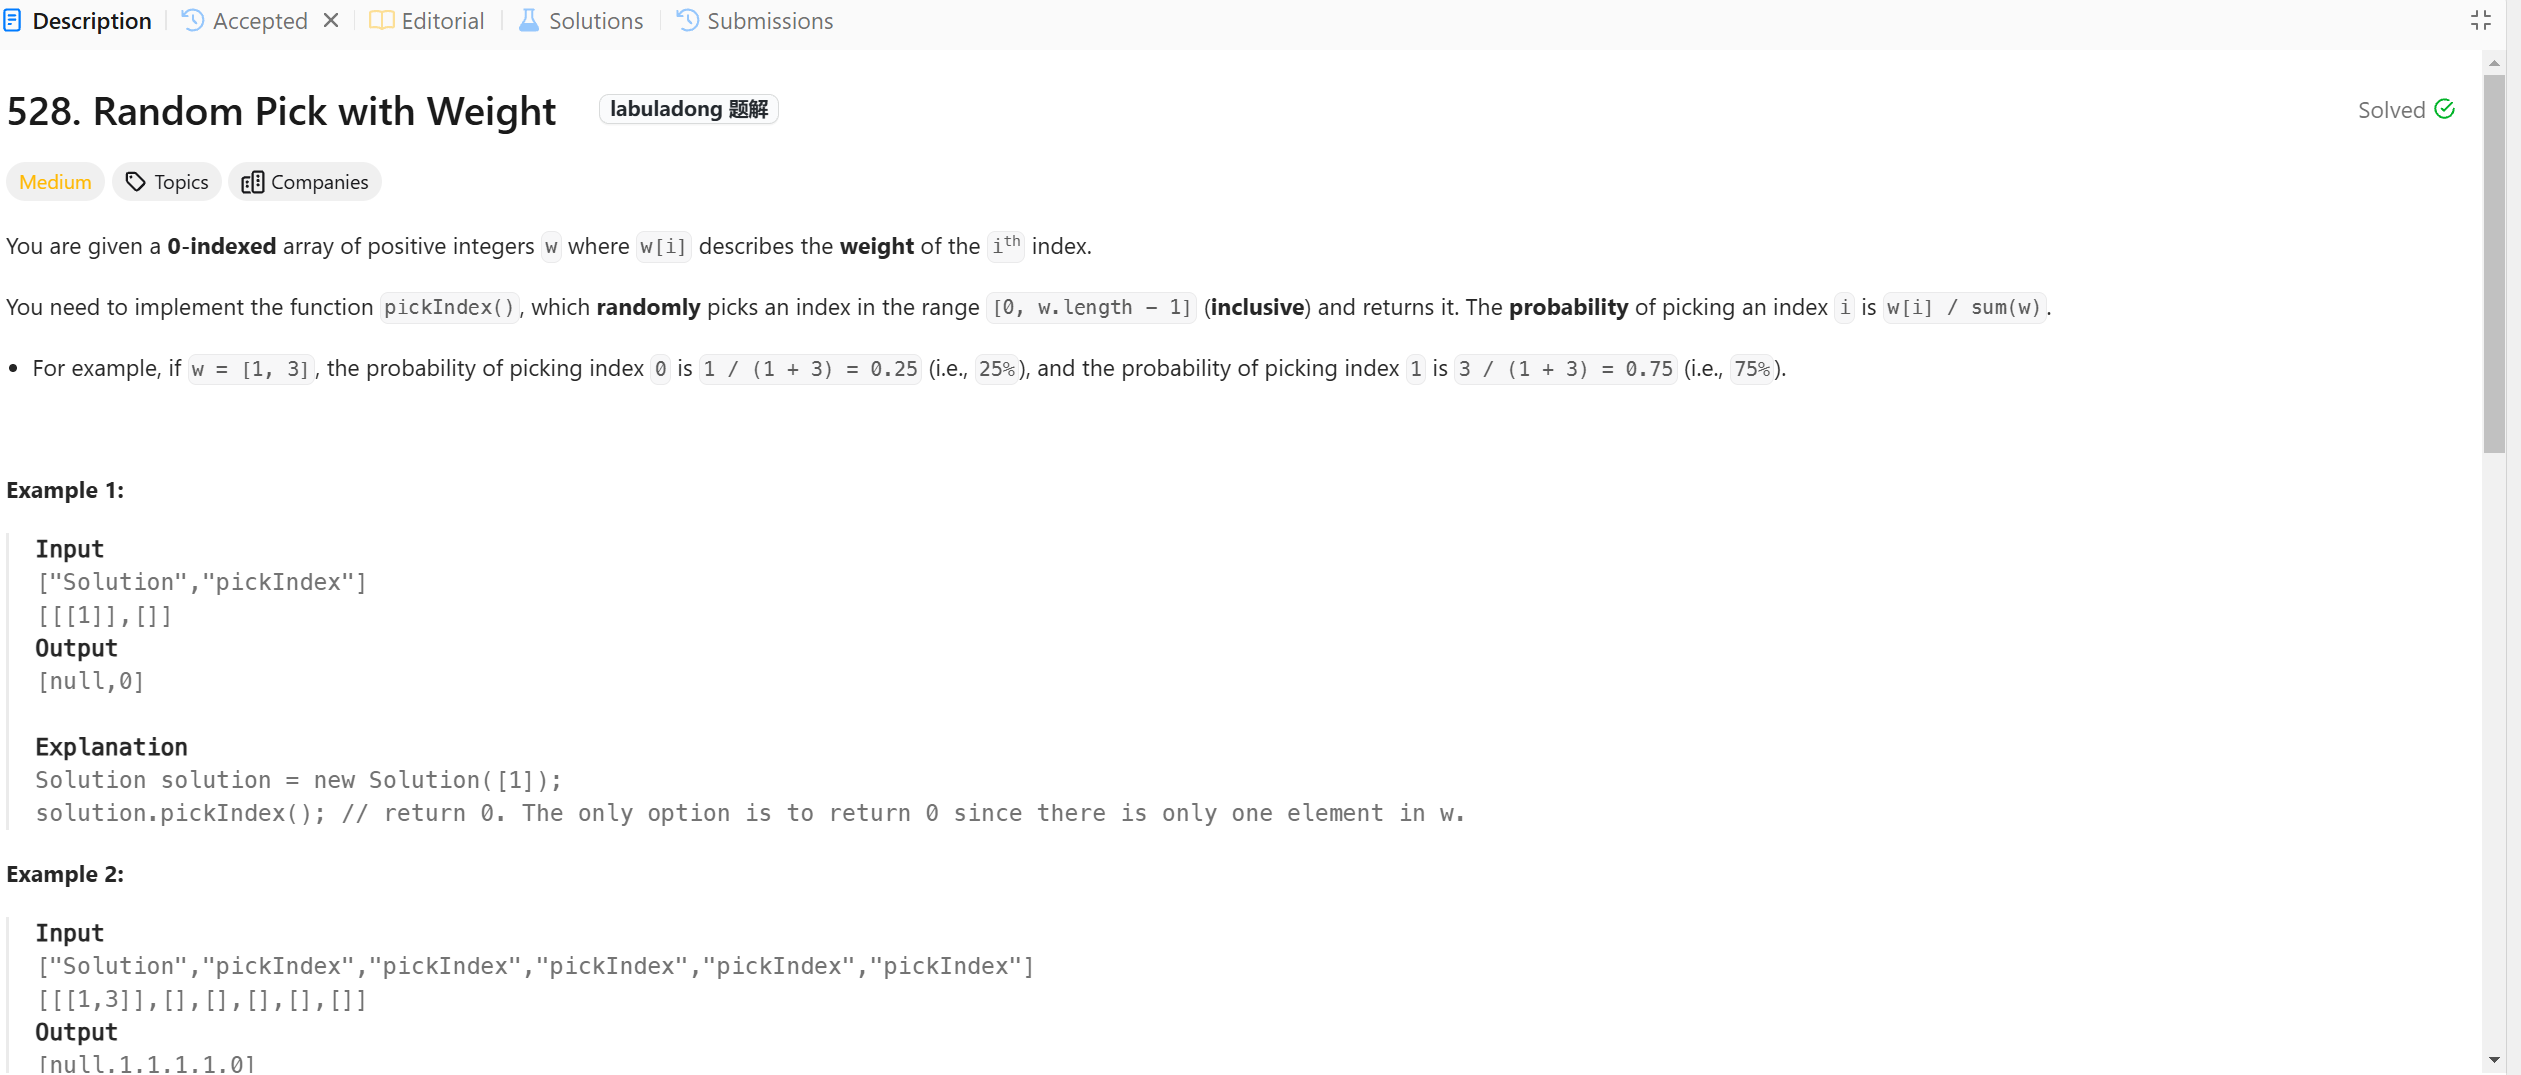

In [ ]:
class Solution:

    def __init__(self, w: List[int]):
        n = len(w)
        preSum = [0] * (n+1)
        for i in range(1, n+1):
            preSum[i] = preSum[i-1] + w[i-1]
        self.preSum = preSum

    def pickIndex(self) -> int:
        n = len(self.preSum)
        # 生成在闭区间 [1, preSum[n - 1]] 中的随机整数
        target = random.randint(1, self.preSum[n - 1]) 

        # 获取 target 在前缀和数组 preSum 中的索引
        # 别忘了前缀和数组 preSum 和原始数组 w 有一位索引偏移
        return self.leftbound(self.preSum, target) - 1

    def leftbound(self, nums: List[int], target: int) -> int:

        left = 0
        right = len(nums)
        
        #搜索区间[left, right)
        #初始搜索区间[0, n), indexs
        while left < right:
            mid = left + (right - left) // 2
            val = nums[mid]
            
            #mid val小于target，搜索右半区
            if val < target:
                #搜索区间[mid+1, right)
                left = mid+1
            #mid val大于target, 搜索左半区
            elif val > target:
                #搜索区间[left, mid)
                right = mid
            #mid val 等于target, 我们找左边界，所以我们尝试搜索存在val的左边
            elif val == target:
                #搜索区间[left, mid)
                right = mid
        return left

# Your Solution object will be instantiated and called as such:
# obj = Solution(w)
# param_1 = obj.pickIndex()